<a href="https://colab.research.google.com/github/pauNancy21/Tareas-Ciencia-Datos/blob/main/C%C3%B3digo_fuente_ASE_I_NPGR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Alumna: Nancy Paulina González Reyes

No. de cuenta: 217374-6

In [123]:
#Se instalan las librerías que se van a utilizar
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [124]:
#Se importan las librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io as io
import random 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import scipy.cluster.hierarchy as sch
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [126]:
#Cargar los archivos
from google.colab import files
uploaded = files.upload()

Saving Analisis metro.csv to Analisis metro (3).csv


In [127]:
#Leer los archivos
analisismetro = pd.read_csv(io.BytesIO(uploaded['Analisis metro.csv']), sep = ',')

print('Base shape: ', analisismetro.shape)


Base shape:  (259, 12)


In [128]:
# Forma de los datos
print('Datos shape: ', analisismetro.shape)
# Mostrar las primeros 4 filas del DataFrame concatenado
analisismetro.head(5)

Datos shape:  (259, 12)


,estacion,linea,dia,hora-inicio-reporte,hora-fin-reporte,descripcion,delito,sexo-victima,edad-victima,sexo-agresor,edad-agresor,sin-detenido
0,SAN PEDRO DE LOS PINOS,7,MARTES,19:30,00:46,TOCAMIENTO EN GLUTEO,ABUSO SEXUAL,MUJER,23,HOMBRE,32,NaN
1,OCEANIA,5,JUEVES,14:01,19:30,TOCAMIENTO EN GLUTEO,ABUSO SEXUAL,MUJER,31,HOMBRE,63,NaN
2,MERCED,1,LUNES,09:43,10:15,TOCAMIENTO EN GLUTEO,ABUSO SEXUAL,HOMBRE,18,HOMBRE,36,NaN
3,SANTA ANITA,8,LUNES,14:55,21:40,TOMA DE FOTOGRAFIAS,ACOSO SEXUAL,MUJER,27,HOMBRE,59,NaN
4,INSURGENTES,1,LUNES,16:36,17:35,TOCAMIENTO EN GLUTEO,ABUSO SEXUAL,MUJER,24,HOMBRE,50,SIN DETENIDO


In [130]:
analisismetro.tail(5)

,estacion,linea,dia,hora-inicio-reporte,hora-fin-reporte,descripcion,delito,sexo-victima,edad-victima,sexo-agresor,edad-agresor,sin-detenido
254,INDIOS VERDES,3,VIERNES,14:39,19:49,TOCAMIENTO EN ÃREA PÃšBICA,ABUSO SEXUAL,MUJER,29,HOMBRE,49,NaN
255,HIDALGO,2,LUNES,10:50,11:05,PERSECUCIÃ“N CON POSIBLES FINES LASCIVOS,ACOSO SEXUAL,HOMBRE,37,HOMBRE,62,NaN
256,REFINERIA,7,LUNES,15:15,20:09,TOCAMIENTO EN SENO Y PIERNA DERECHA,ABUSO SEXUAL,MUJER,38,HOMBRE,36,NaN
257,DEPORTIVO 18 DE MARZO,3,VIERNES,19:42,05:09,TOCAMIENTO EN SENO IZQUIERDO,ABUSO SEXUAL,MUJER,25,HOMBRE,56,NaN
258,CHAPULTEPEC,1,VIERNES,16:42,20:05,TOCAMIENTO EN GLUTEOS,ABUSO SEXUAL,MUJER,43,HOMBRE,62,NaN


In [131]:
#tipo de datos
analisismetro.dtypes

estacion               object
linea                  object
dia                    object
hora-inicio-reporte    object
hora-fin-reporte       object
descripcion            object
delito                 object
sexo-victima           object
edad-victima            int64
sexo-agresor           object
edad-agresor            int64
sin-detenido           object
dtype: object

In [132]:
analisismetro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   estacion             259 non-null    object
 1   linea                259 non-null    object
 2   dia                  259 non-null    object
 3   hora-inicio-reporte  259 non-null    object
 4   hora-fin-reporte     259 non-null    object
 5   descripcion          259 non-null    object
 6   delito               259 non-null    object
 7   sexo-victima         259 non-null    object
 8   edad-victima         259 non-null    int64 
 9   sexo-agresor         259 non-null    object
 10  edad-agresor         259 non-null    int64 
 11  sin-detenido         9 non-null      object
dtypes: int64(2), object(10)
memory usage: 24.4+ KB


In [133]:
analisismetro.describe()

,edad-victima,edad-agresor
count,259.000000,259.000000
mean,26.926641,36.667954
std,9.808161,12.461638
min,1.000000,16.000000
25%,20.000000,27.500000
50%,25.000000,35.000000
75%,31.000000,45.000000
max,84.000000,73.000000


In [134]:
#Mostrar el por ciento de los datos faltantes 
for column in analisismetro.columns:
    percentage = analisismetro[column].isnull().mean()
    print(f"{column}: {round(percentage*100, 2)}%")

estacion: 0.0%
linea: 0.0%
dia: 0.0%
hora-inicio-reporte: 0.0%
hora-fin-reporte: 0.0%
descripcion: 0.0%
delito: 0.0%
sexo-victima: 0.0%
edad-victima: 0.0%
sexo-agresor: 0.0%
edad-agresor: 0.0%
sin-detenido: 96.53%


In [135]:
#Mejor visualización
analisismetro.isnull().sum().sort_values(ascending=False)

sin-detenido           250
estacion                 0
linea                    0
dia                      0
hora-inicio-reporte      0
hora-fin-reporte         0
descripcion              0
delito                   0
sexo-victima             0
edad-victima             0
sexo-agresor             0
edad-agresor             0
dtype: int64

Análisis Exploratorio de Datos

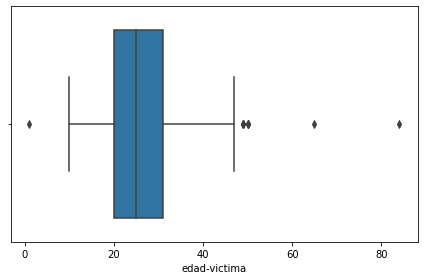

In [136]:
#Valores atípicos
fig, ax = plt.subplots(nrows=1, ncols=1)
ax = sns.boxplot(x=analisismetro["edad-victima"])
fig.tight_layout()

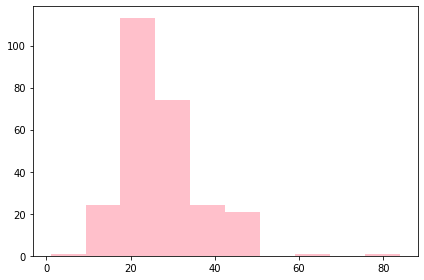

In [137]:
#Gráfica de la edad de las víctimas
fig, ax = plt.subplots(nrows=1, ncols=1)
#plt.hist(datos["edad-victima"].fillna(0).astype(float))
plt.hist(analisismetro["edad-victima"],color='pink')
fig.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


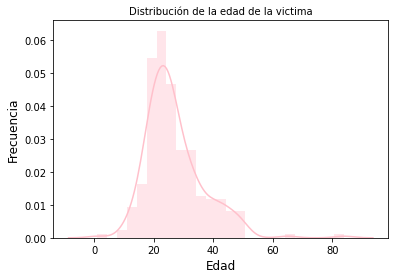

In [138]:
#Grafica de la distribución de observaciones por la edad
sns.distplot(analisismetro['edad-victima'], color = 'pink')

#Títulos y ejes
plt.title('Distribución de la edad de la victima', fontsize = 10)
plt.xlabel('Edad',fontsize = 12)
plt.ylabel('Frecuencia', fontsize = 12)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

#plt.savefig('age_distribution.png')
plt.show()

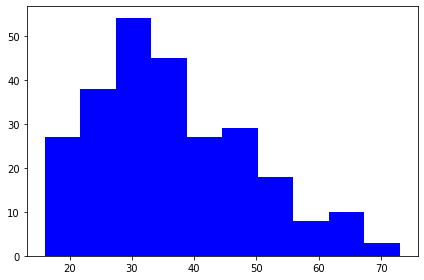

In [139]:
#Gráfica de la edad de las víctimas
fig, ax = plt.subplots(nrows=1, ncols=1)
#plt.hist(datos["edad-victima"].fillna(0).astype(float))
plt.hist(analisismetro["edad-agresor"],color='blue')
fig.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


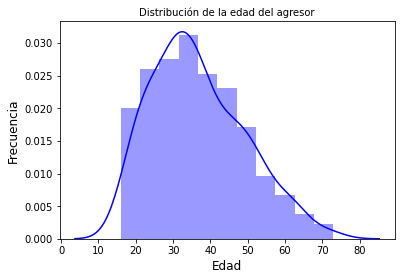

In [140]:
#Grafica de la distribución de observaciones por la edad
sns.distplot(analisismetro['edad-agresor'], color = 'blue')

#Títulos y ejes
plt.title('Distribución de la edad del agresor', fontsize = 10)
plt.xlabel('Edad',fontsize = 12)
plt.ylabel('Frecuencia', fontsize = 12)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

#plt.savefig('age_distribution.png')
plt.show()

<Figure size 1008x720 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0, flags=flags)


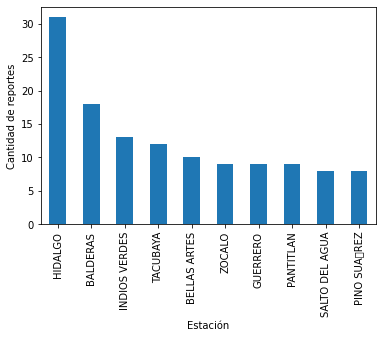

<Figure size 1008x720 with 0 Axes>

In [141]:
rel_est_hor = analisismetro['estacion'].value_counts()
my_plot = rel_est_hor.head(10).plot(kind="bar")
plt.ylabel('Cantidad de reportes')
plt.xlabel('Estación')
plt.figure(figsize=(14,10))

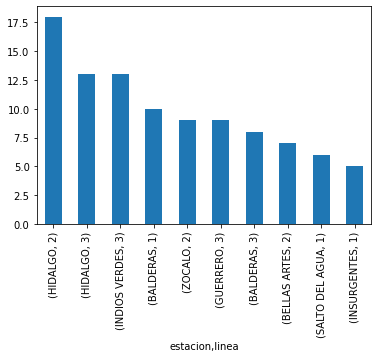

In [142]:
my_plot = analisismetro[['estacion','linea']].value_counts().head(10).plot(kind='bar')

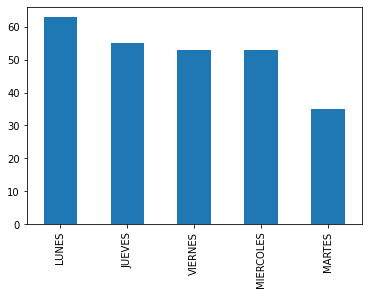

In [143]:
myplot = analisismetro['dia'].value_counts().plot(kind='bar')

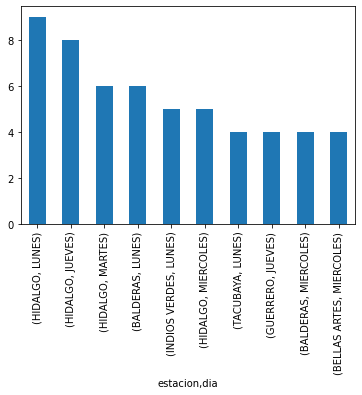

In [144]:
my_plot = analisismetro[['estacion','dia']].value_counts().head(10).plot(kind='bar')

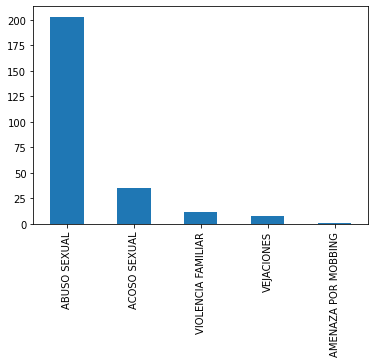

In [146]:
myplot = analisismetro['delito'].value_counts().plot(kind='bar')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 141 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 141 missing from current font.
  font.set_text(s, 0, flags=flags)


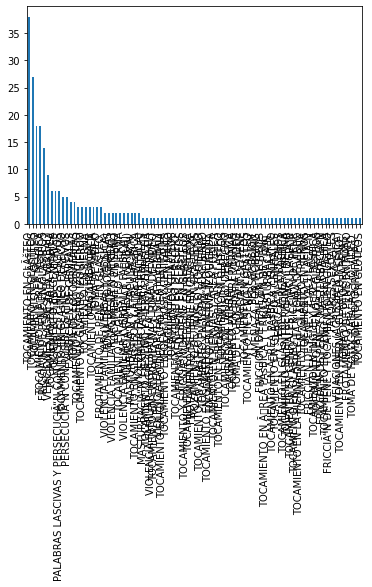

In [147]:
myplot = analisismetro['descripcion'].value_counts().plot(kind='bar')

In [148]:
#Convertir strings a números
analisis_metro= analisismetro

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

analisis_metro['estacion'] = encoder.fit_transform(analisis_metro['estacion'])
analisis_metro['descripcion'] = encoder.fit_transform(analisis_metro['descripcion'])
analisis_metro['delito'] = encoder.fit_transform(analisis_metro['delito'])
analisis_metro['dia'] = encoder.fit_transform(analisis_metro['dia'])
analisis_metro['linea'] = encoder.fit_transform(analisis_metro['linea'])
analisis_metro['hora-inicio-reporte'] = encoder.fit_transform(analisis_metro['hora-inicio-reporte'])
analisis_metro['hora-fin-reporte'] = encoder.fit_transform(analisis_metro['hora-fin-reporte'])
analisis_metro['sexo-agresor'] = encoder.fit_transform(analisis_metro['sexo-agresor'])
analisis_metro['sexo-victima'] = encoder.fit_transform(analisis_metro['sexo-victima'])


In [149]:
analisis_metro.describe()

,estacion,linea,dia,hora-inicio-reporte,hora-fin-reporte,descripcion,delito,sexo-victima,edad-victima,sexo-agresor,edad-agresor
count,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000
mean,39.976834,3.274131,1.945946,89.034749,96.969112,41.586873,0.420849,0.961390,26.926641,0.034749,36.667954
std,23.177764,2.899837,1.456399,55.742371,52.872589,22.312509,0.998308,0.193037,9.808161,0.203528,12.461638
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,16.000000
25%,20.000000,2.000000,1.000000,38.500000,55.500000,27.500000,0.000000,1.000000,20.000000,0.000000,27.500000
50%,35.000000,3.000000,2.000000,85.000000,99.000000,35.000000,0.000000,1.000000,25.000000,0.000000,35.000000
75%,57.000000,5.000000,3.000000,136.500000,139.000000,58.500000,0.000000,1.000000,31.000000,0.000000,45.000000
max,82.000000,10.000000,4.000000,191.000000,189.000000,87.000000,4.000000,1.000000,84.000000,2.000000,73.000000


Text(0.5, 0, 'Número de reporte')

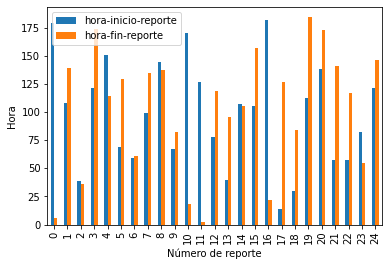

In [150]:
analisis_metro.head(25)[['hora-inicio-reporte', 'hora-fin-reporte']].plot(kind='bar')
plt.ylabel('Hora')
plt.xlabel('Número de reporte')

In [151]:
analisis_metro = analisismetro.drop(['sin-detenido'], axis=1)

AGRUPAMIENTO

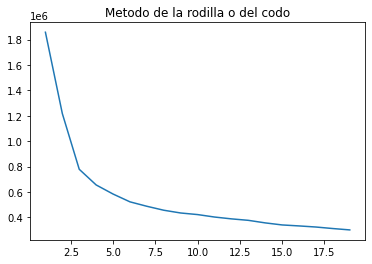

Elbow:  4


In [152]:
# get all features except the class
data_clust = analisis_metro.loc[:, analisis_metro.columns != "class_label"]

wcss = []

for i in range(1,20):
  kmeans = KMeans(n_clusters = i, init = "k-means++", max_iter = 300,
                  n_init = 10, random_state = 2022)
  kmeans.fit(data_clust)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,20), wcss)
plt.title("Metodo de la rodilla o del codo")
#plt.xlabel("Numero de grupos (k)")
#plt.ylabel("WCSS")
plt.show()

kl = KneeLocator(range(1,20), wcss, curve="convex", direction="decreasing")
print("Elbow: ", kl.elbow)

In [153]:
kmeans = KMeans(n_clusters=3,init="k-means++", max_iter=300,
                n_init=10,random_state=2022)
y_kmeans = kmeans.fit(data_clust)
print(kmeans.cluster_centers_)

[[3.70149254e+01 3.52238806e+00 1.88059701e+00 4.40970149e+01
  8.24776119e+01 4.04328358e+01 3.50746269e-01 9.40298507e-01
  2.64850746e+01 4.47761194e-02 3.68880597e+01]
 [4.46630435e+01 2.77173913e+00 1.89130435e+00 1.28347826e+02
  1.47510870e+02 4.48913043e+01 6.08695652e-01 1.00000000e+00
  2.74021739e+01 2.17391304e-02 3.69021739e+01]
 [3.89393939e+01 3.66666667e+00 2.36363636e+00 1.61909091e+02
  1.49090909e+01 3.70606061e+01 1.81818182e-01 9.39393939e-01
  2.73939394e+01 3.03030303e-02 3.51212121e+01]]


In [154]:
from sklearn.decomposition import PCA
X = StandardScaler().fit_transform(data_clust)
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data=principalComponents, columns=["CP1","CP2"])
principalDf["labels"] = kmeans.labels_
principalDf

,CP1,CP2,labels
0,-0.292018,-0.039745,2
1,-0.038382,1.289917,1
2,-2.242708,2.651975,0
3,1.664311,0.624307,1
4,0.050582,0.998280,1
...,...,...,...
254,0.822701,0.480732,1
255,-1.495859,3.976544,0
256,0.984589,-0.150784,1
257,0.247110,0.820639,2


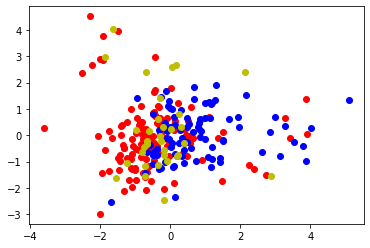

In [155]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

cluster_0 = principalDf[principalDf["labels"] == 0]
cluster_1 = principalDf[principalDf["labels"] == 1]
cluster_2 = principalDf[principalDf["labels"] == 2]
cluster_3 = principalDf[principalDf["labels"] == 3]
#cluster_4 = principalDf[principalDf["labels"] == 4]

x_0 = cluster_0["CP1"]
y_0 = cluster_0["CP2"]

x_1 = cluster_1["CP1"]
y_1 = cluster_1["CP2"]

x_2 = cluster_2["CP1"]
y_2 = cluster_2["CP2"]

x_3 = cluster_3["CP1"]
y_3 = cluster_3["CP2"]

#x_4 = cluster_4["CP1"]
#y_4 = cluster_4["CP2"]


ax.scatter(x_0, y_0, c='r', marker='o')
ax.scatter(x_1, y_1, c='b', marker='o')
ax.scatter(x_2, y_2, c='y', marker='o')
ax.scatter(x_3, y_3, c='m', marker='o')
#ax.scatter(x_4, y_4, c='g', marker='o')

plt.show()

Predicción del comportamiento de la violencia en el metro de la CDMX

In [156]:
from google.colab import files
uploaded = files.upload()

Saving Reportes delitos en el STC .csv to Reportes delitos en el STC  (1).csv


In [157]:
reportemetro = pd.read_csv(io.BytesIO(uploaded['Reportes delitos en el STC .csv']), sep = ',')

# Forma de los datos
print('Base shape: ', reportemetro.shape)


Base shape:  (4, 8)


In [158]:
reportemetro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   delito  4 non-null      object 
 1   2015    4 non-null      int64  
 2   2016    4 non-null      int64  
 3   2017    4 non-null      int64  
 4   2018    4 non-null      int64  
 5   2019    3 non-null      float64
 6   2020    4 non-null      int64  
 7   2021    4 non-null      int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 384.0+ bytes


In [159]:
#Mejor visualización
reportemetro.isnull().sum().sort_values(ascending=False)

2019      1
delito    0
2015      0
2016      0
2017      0
2018      0
2020      0
2021      0
dtype: int64

In [160]:
reportemetro.head(5)

,delito,2015,2016,2017,2018,2019,2020,2021
0,total,162,245,234,176,440.0,217,332
1,abuso-sexual,127,202,195,149,383.0,169,270
2,hostigamiento-sexual,35,40,38,27,57.0,46,59
3,violacion,0,3,1,0,NaN,2,3


In [161]:
reportemetro.tail(5)

,delito,2015,2016,2017,2018,2019,2020,2021
0,total,162,245,234,176,440.0,217,332
1,abuso-sexual,127,202,195,149,383.0,169,270
2,hostigamiento-sexual,35,40,38,27,57.0,46,59
3,violacion,0,3,1,0,NaN,2,3


In [162]:
#Sustitur los valores por la media
#La media reemplaza los datos numéricos

mean = (reportemetro["2019"].mean())
reportemetro["2019"].fillna(mean, inplace=True)


In [163]:
#Mejor visualización
reportemetro.isnull().sum().sort_values(ascending=False)

delito    0
2015      0
2016      0
2017      0
2018      0
2019      0
2020      0
2021      0
dtype: int64

In [164]:
reportemetro.head(5)

,delito,2015,2016,2017,2018,2019,2020,2021
0,total,162,245,234,176,440.000000,217,332
1,abuso-sexual,127,202,195,149,383.000000,169,270
2,hostigamiento-sexual,35,40,38,27,57.000000,46,59
3,violacion,0,3,1,0,293.333333,2,3


In [166]:
#myplot = reportemetro['delito'].value_counts().plot(kind='bar')

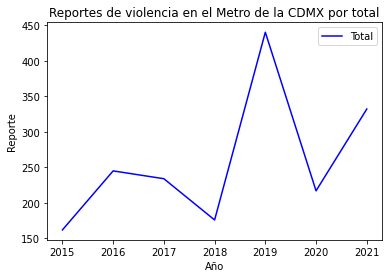

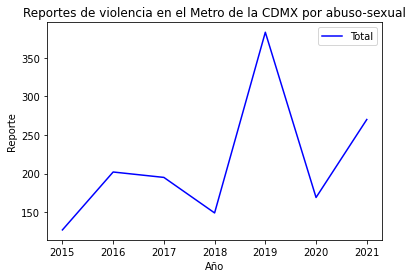

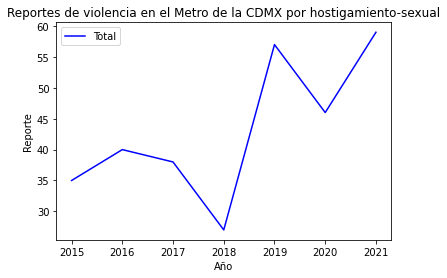

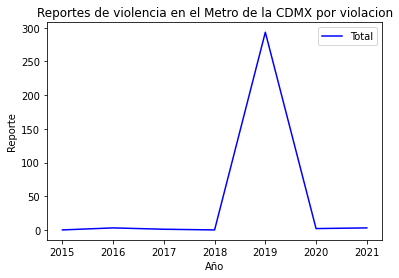

In [167]:
#Se guardan en una lista los nombres de los delitos
reporte = reportemetro["delito"].tolist()
reporte1 = reporte [:50]
reporte2 = reporte[50:]

Años = list(range(2015, 2022))

X = Años
k = 0
#Ciclo para graficar las tendencias de reportes
for i in reporte1:

  Total = []
  
  #Ciclo para guardar en un arreglo los reportes de violencia, por año
  l = 1
  for j in Años:
    Total.append(reportemetro.iat[k, l])
    l+= 1

  #Se grafican las cantidades con una línea por cada una
  plt.figure()
  plt.plot(X, Total, '-b',label='Total')

  #Si la fila corresponde al total, se pone el nombre del país
  if (i=="Total"):
    plt.title("Reportes de violencia en el Metro de la CDMX")
  else:
    plt.title("Reportes de violencia en el Metro de la CDMX por %s" % i)

  plt.xlabel("Año")
  plt.ylabel("Reporte")

  plt.legend(loc='best')
  plt.show()

  k+=1

In [169]:
#Se crea un dataframe con los datos de los años y delitos
df = reportemetro
df = df[df.columns[pd.Series(df.columns).str.startswith(('2015','2016','2017','2018','2019','2020','2021'))]].copy()#Se guardan las columnas que contienen datos de feminicidios
df['delito'] = reportemetro['delito'].tolist() #Se copia la columna de las entidades

df = df.set_index('delito', drop = True) #Se asigna como índice la columna de las entidades
print(df.head())

df_delitos = df

                      2015  2016  2017  2018        2019  2020  2021
delito                                                              
total                  162   245   234   176  440.000000   217   332
abuso-sexual           127   202   195   149  383.000000   169   270
hostigamiento-sexual    35    40    38    27   57.000000    46    59
violacion                0     3     1     0  293.333333     2     3


Predicción para el año 2022

In [170]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
forecast = list()
est_dict = dict()

In [171]:
for i in range(len(df)):
  row = df.iloc[i].values
  model = SARIMAX(row)
  results = model.fit()
  forecast.append(round(results.predict(start=6,end=6,dynamic=True)[0]))

df["forecast"] = forecast
df

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


,2015,2016,2017,2018,2019,2020,2021,forecast
delito,,,,,,,,
total,162,245,234,176,440.000000,217,332,181
abuso-sexual,127,202,195,149,383.000000,169,270,136
hostigamiento-sexual,35,40,38,27,57.000000,46,59,44
violacion,0,3,1,0,293.333333,2,3,0
